## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

## Read data

In [3]:
bank_data = pd.read_csv('bank-full\\bank-full.csv')

## Get a peek of the first 5 rows to get an idea of the data

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Find the shape of the Dataframe

In [5]:
bank_data.shape

(45211, 17)

## 5 point summary

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Check for null values in the dataset

In [7]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no null values present

### Check the data types of the columns in the dataset

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

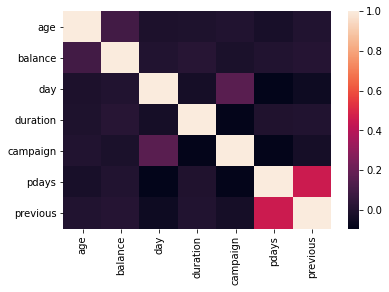

In [10]:
sns.heatmap(bank_data.corr())

### No correlation

### Find the distribution of the continous variables

<AxesSubplot:xlabel='previous', ylabel='Density'>

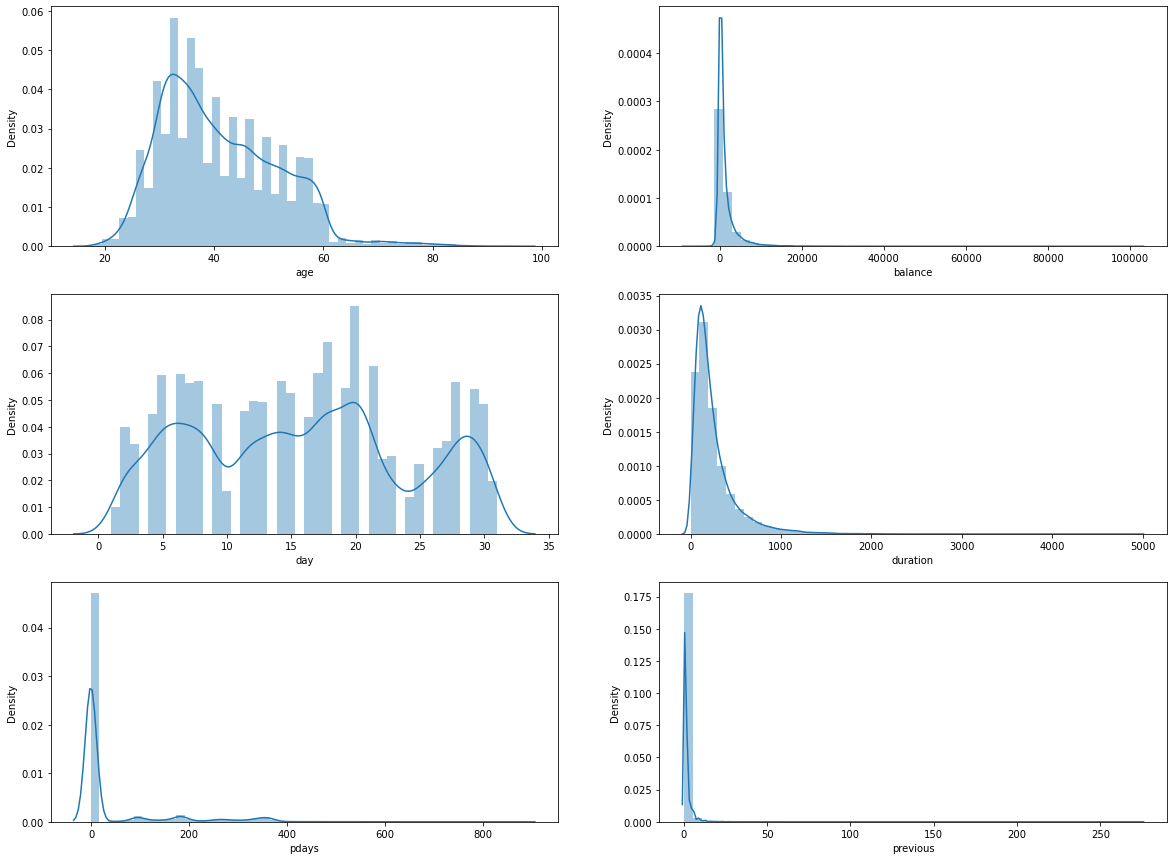

In [11]:
fig, a = plt.subplots(3,2,figsize=(20,15))
sns.distplot(bank_data['age'] , ax=a[0,0])
sns.distplot(bank_data['balance'] , ax=a[0,1])
sns.distplot(bank_data['day'] , ax=a[1,0])
sns.distplot(bank_data['duration'] , ax=a[1,1])
sns.distplot(bank_data['pdays'] , ax=a[2,0])
sns.distplot(bank_data['previous'] , ax=a[2,1])

In [12]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:xlabel='poutcome', ylabel='count'>

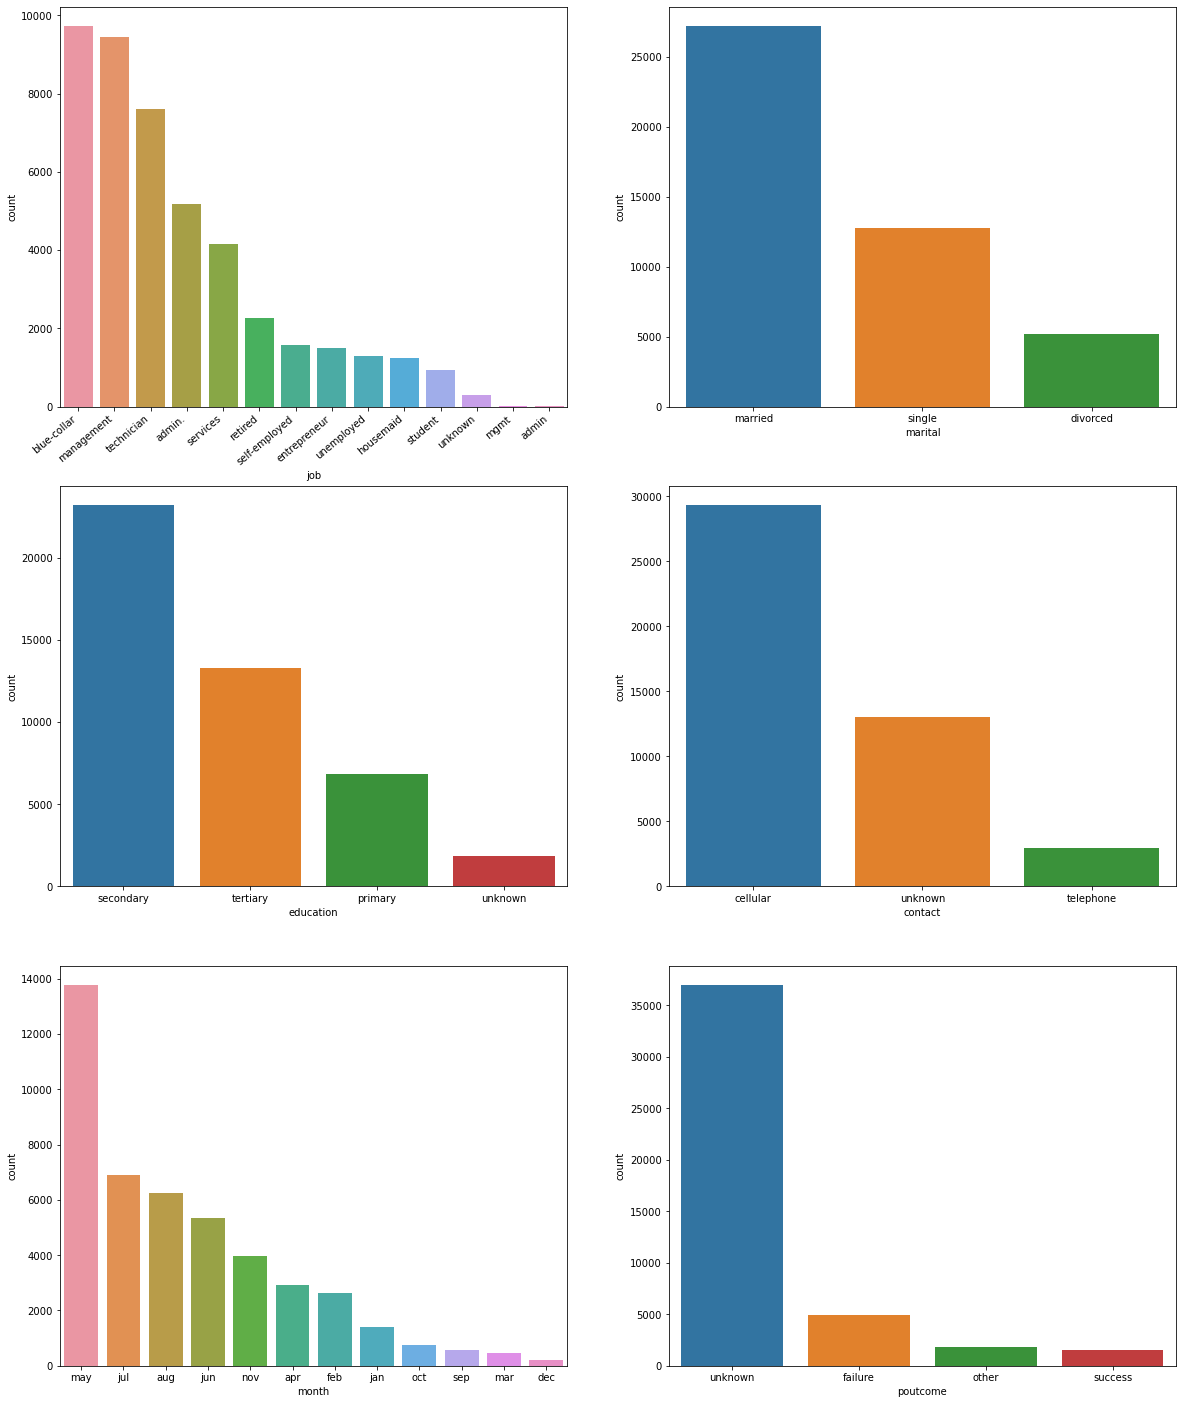

In [13]:
fig, a = plt.subplots(3,2,figsize=(20,25))
ax=sns.countplot(bank_data['job'] , ax=a[0, 0], order = bank_data['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
sns.countplot(bank_data['marital'], ax=a[0, 1], order = bank_data['marital'].value_counts().index)
sns.countplot(bank_data['education'], ax=a[1, 0], order = bank_data['education'].value_counts().index)
sns.countplot(bank_data['contact'], ax=a[1, 1], order = bank_data['contact'].value_counts().index)
sns.countplot(bank_data['month'], ax=a[2, 0], order = bank_data['month'].value_counts().index)
sns.countplot(bank_data['poutcome'], ax=a[2, 1], order = bank_data['poutcome'].value_counts().index)

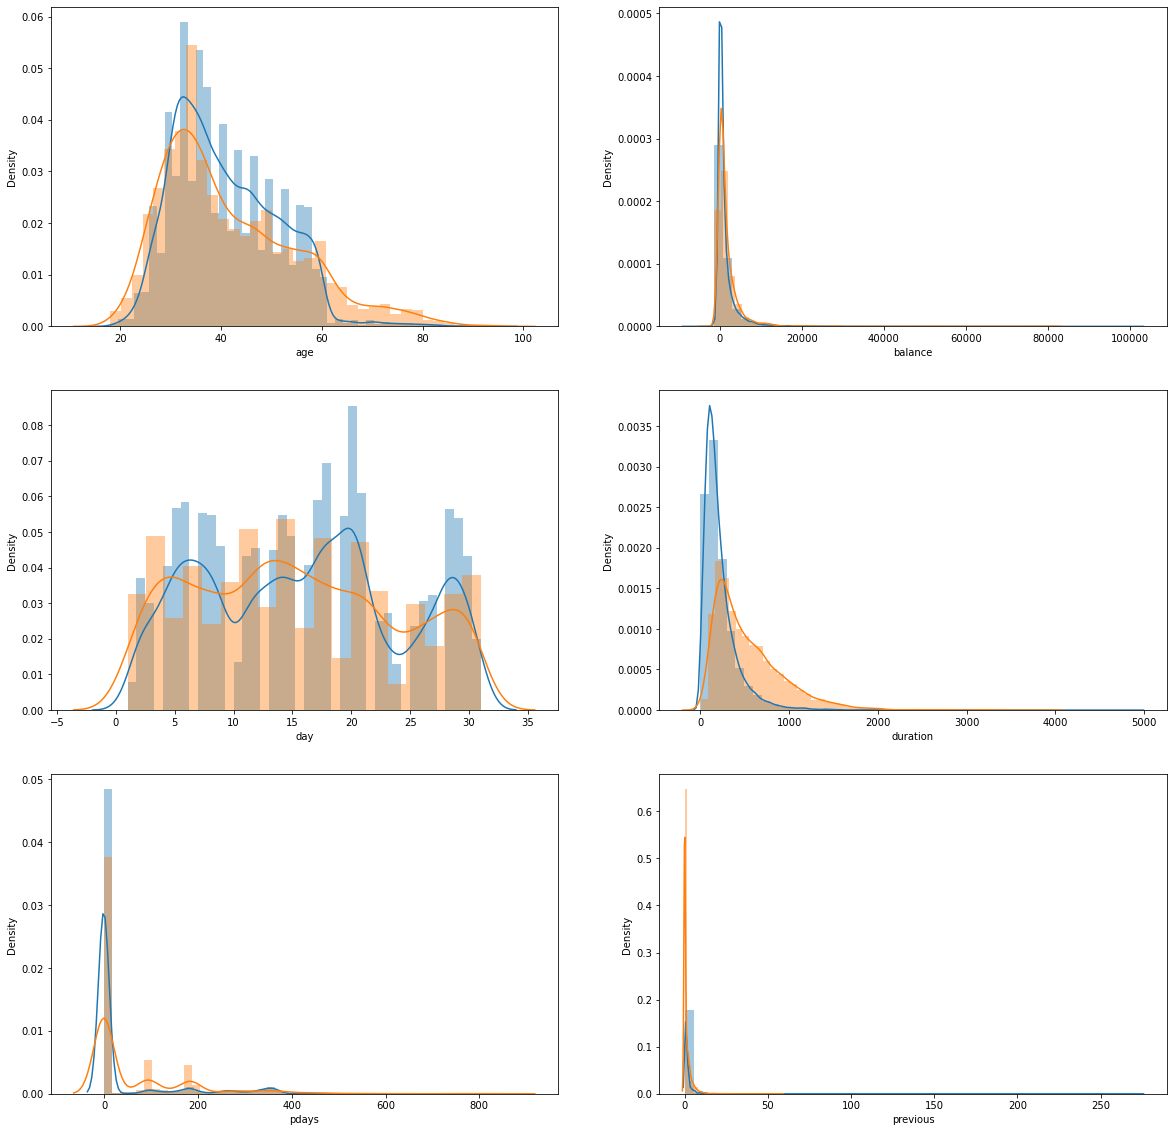

In [14]:
fig, a = plt.subplots(3,2,figsize=(20,20))
sns.distplot( bank_data[bank_data['y'] == 'no']['age'], ax=a[0,0])
sns.distplot( bank_data[bank_data['y'] == 'yes']['age'], ax = a[0,0])
sns.distplot( bank_data[bank_data['y'] == 'no']['balance'], ax=a[0,1])
sns.distplot( bank_data[bank_data['y'] == 'yes']['balance'], ax = a[0,1]);
sns.distplot( bank_data[bank_data['y'] == 'no']['day'], ax=a[1,0])
sns.distplot( bank_data[bank_data['y'] == 'yes']['day'], ax = a[1,0]);
sns.distplot( bank_data[bank_data['y'] == 'no']['duration'], ax=a[1,1])
sns.distplot( bank_data[bank_data['y'] == 'yes']['duration'], ax = a[1,1]);
sns.distplot( bank_data[bank_data['y'] == 'no']['pdays'], ax=a[2,0])
sns.distplot( bank_data[bank_data['y'] == 'yes']['pdays'], ax = a[2,0]);
sns.distplot( bank_data[bank_data['y'] == 'no']['previous'], ax=a[2,1])
sns.distplot( bank_data[bank_data['y'] == 'yes']['previous'], ax = a[2,1]);

<AxesSubplot:xlabel='poutcome', ylabel='count'>

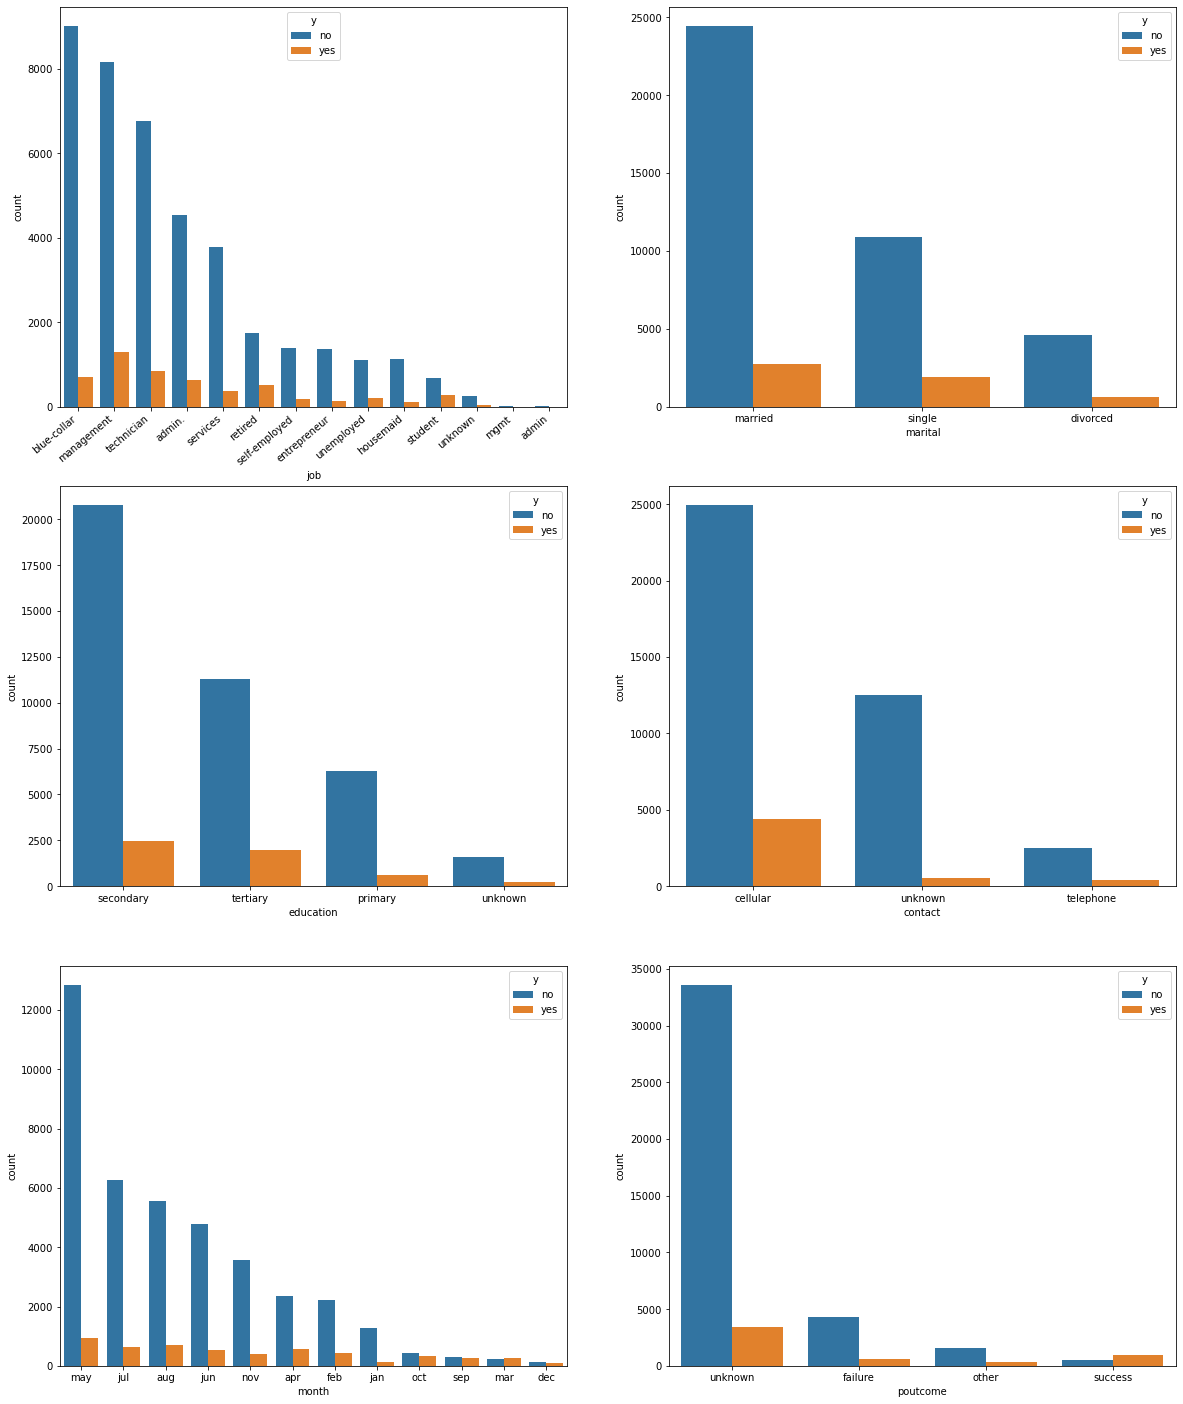

In [15]:
fig, a = plt.subplots(3,2,figsize=(20,25))
ax=sns.countplot(bank_data['job'], hue=bank_data["y"], ax=a[0, 0], order = bank_data['job'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
sns.countplot(bank_data['marital'], hue=bank_data["y"], ax=a[0, 1], order = bank_data['marital'].value_counts().index)
sns.countplot(bank_data['education'], hue=bank_data["y"], ax=a[1, 0], order = bank_data['education'].value_counts().index)
sns.countplot(bank_data['contact'], hue=bank_data["y"], ax=a[1, 1], order = bank_data['contact'].value_counts().index)
sns.countplot(bank_data['month'], hue=bank_data["y"], ax=a[2, 0], order = bank_data['month'].value_counts().index)
sns.countplot(bank_data['poutcome'], hue=bank_data["y"], ax=a[2, 1], order = bank_data['poutcome'].value_counts().index)

<AxesSubplot:xlabel='poutcome', ylabel='age'>

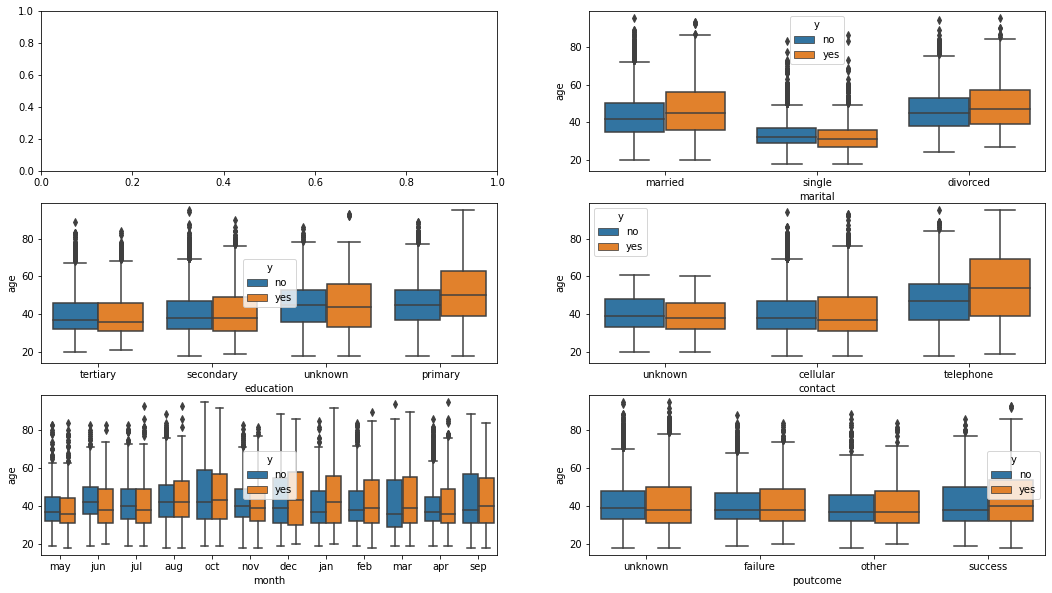

In [16]:
fig , a = plt.subplots(3,2,figsize=(18,10))
# sns.boxplot(bank_data['job'] , bank_data['age'] , hue=bank_data['y'] , ax=a[0,0])
sns.boxplot(bank_data['marital'] , bank_data['age'] , hue=bank_data['y'] , ax=a[0,1])
sns.boxplot(bank_data['education'] , bank_data['age'] , hue=bank_data['y'],  ax=a[1,0])
sns.boxplot(bank_data['contact'] , bank_data['age'] , hue=bank_data['y'],  ax=a[1,1])
sns.boxplot(bank_data['month'] , bank_data['age'] , hue=bank_data['y'],  ax=a[2,0])
sns.boxplot(bank_data['poutcome'] , bank_data['age'] , hue=bank_data['y'],  ax=a[2,1])


<AxesSubplot:xlabel='poutcome', ylabel='balance'>

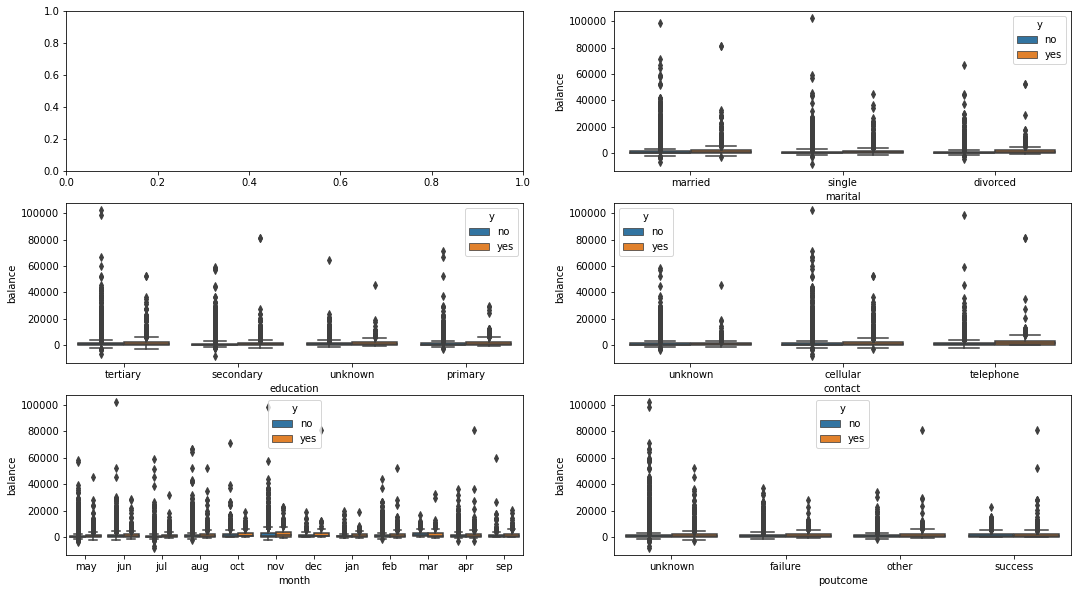

In [17]:
fig , a = plt.subplots(3,2,figsize=(18,10))
# sns.boxplot(bank_data['job'] , bank_data['age'] , hue=bank_data['y'] , ax=a[0,0])
sns.boxplot(bank_data['marital'] , bank_data['balance'] , hue=bank_data['y'] , ax=a[0,1])
sns.boxplot(bank_data['education'] , bank_data['balance'] , hue=bank_data['y'],  ax=a[1,0])
sns.boxplot(bank_data['contact'] , bank_data['balance'] , hue=bank_data['y'],  ax=a[1,1])
sns.boxplot(bank_data['month'] , bank_data['balance'] , hue=bank_data['y'],  ax=a[2,0])
sns.boxplot(bank_data['poutcome'] , bank_data['balance'] , hue=bank_data['y'],  ax=a[2,1])


In [18]:
bank_data.loc[bank_data['job'] == 'admin.', 'job'] = 'admin'

## Split data

In [19]:
x = bank_data.drop('y', axis = 1)
y = bank_data['y']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

## Encoding

In [20]:
job = LabelEncoder()
X_train['job'] = job.fit_transform(X_train['job'])
marital = LabelEncoder()
X_train['marital'] = marital.fit_transform(X_train['marital'])
education = LabelEncoder()
X_train['education'] = education.fit_transform(X_train['education'])
contact = LabelEncoder()
X_train['contact'] = contact.fit_transform(X_train['contact'])
month = LabelEncoder()
X_train['month'] = month.fit_transform(X_train['month'])
poutcome = LabelEncoder()
X_train['poutcome'] = poutcome.fit_transform(X_train['poutcome'])
default = LabelEncoder()
X_train['default'] = default.fit_transform(X_train['default'])
housing = LabelEncoder()
X_train['housing'] = housing.fit_transform(X_train['housing'])
loan = LabelEncoder()
X_train['loan'] = loan.fit_transform(X_train['loan'])
y1 = LabelEncoder()
y_train = y1.fit_transform(y_train)


In [21]:
X_test['job'] = job.transform(X_test['job'])
X_test['marital'] = marital.transform(X_test['marital'])
X_test['education'] = education.transform(X_test['education'])
X_test['contact'] = contact.transform(X_test['contact'])
X_test['month'] = month.transform(X_test['month'])
X_test['poutcome'] = poutcome.transform(X_test['poutcome'])
X_test['default'] = default.transform(X_test['default'])
X_test['housing'] = housing.transform(X_test['housing'])
X_test['loan'] = loan.transform(X_test['loan'])
y_test = y1.transform(y_test)

In [22]:
print('INPUT')
print('Training input set has', X_train.shape[0],'rows and',X_train.shape[1],'columns')
print('Testing input set has', X_test.shape[0],'rows and',X_test.shape[1],'columns')
print('Training input set has',X_train.shape[0]* 100/x.shape[0],'% records and Testing input set has',X_test.shape[0]* 100/x.shape[0],'% records')
print('OUTPUT')
print('Training output set has', y_train.shape[0],'rows and 1 column')
print('Testing output set has', y_test.shape[0],'rows and 1 column')
print('Training output set has',y_train.shape[0]* 100/y.shape[0],'% records and Testing output set has',y_test.shape[0]* 100/y.shape[0],'% records')



INPUT
Training input set has 36168 rows and 16 columns
Testing input set has 9043 rows and 16 columns
Training input set has 79.99823051912145 % records and Testing input set has 20.001769480878547 % records
OUTPUT
Training output set has 36168 rows and 1 column
Testing output set has 9043 rows and 1 column
Training output set has 79.99823051912145 % records and Testing output set has 20.001769480878547 % records


## Scaling

In [23]:
scaler = StandardScaler().fit(X_train)

In [24]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Upsampling

In [25]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [26]:
X_train_sm, y_train_sm = upsample_SMOTE(X_train, y_train)

63858 63858


## Feature selection

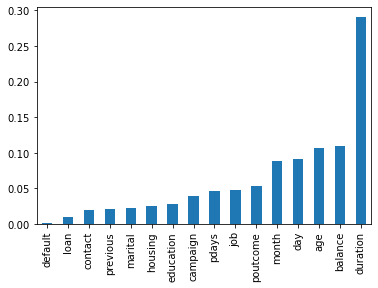

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_importances = pd.Series(rfc.feature_importances_, index=x.columns).sort_values()

rfc_importances.plot(kind='bar')
plt.show()

## Model

In [28]:
def confusion_matrix_heatmap(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                      columns = [i for i in ["0","1"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.show()

In [29]:
def MLmodel(model, X_train, y_train, X_test, y_test):
    m = model
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    return y_pred, m.score(X_test, y_test)

In [30]:
def curve(y_test, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

## Logistic regression

In [31]:
y_pred, score_lg = MLmodel(LogisticRegression(solver="liblinear"), X_train, y_train, X_test, y_test)
print('Model score for Testing data is',score_lg)

Model score for Testing data is 0.8907442220502045


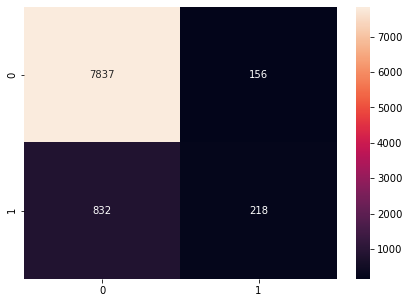

In [32]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

ROC_AUC_SCORE is 0.5940509850881426


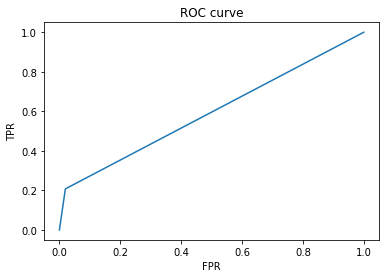

In [33]:
curve(y_test, y_pred)

In [34]:
y_pred, score_lg = MLmodel(LogisticRegression(solver="liblinear"), X_train_sm, y_train_sm, X_test, y_test)
print('Model score for Testing data is',score_lg)

Model score for Testing data is 0.804268494968484


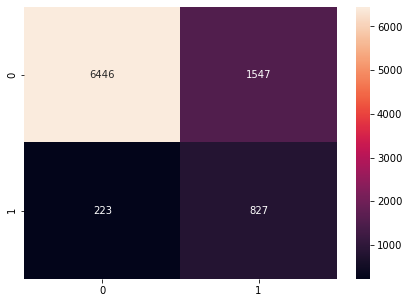

In [35]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7993
           1       0.35      0.79      0.48      1050

    accuracy                           0.80      9043
   macro avg       0.66      0.80      0.68      9043
weighted avg       0.89      0.80      0.83      9043

ROC_AUC_SCORE is 0.7970373481558268


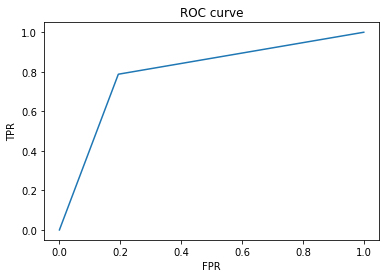

In [36]:
curve(y_test, y_pred)

## Random Forest

In [37]:
y_pred, score_rf = MLmodel(RandomForestClassifier(), X_train, y_train, X_test, y_test)
print('Model score for Testing data is',score_rf)

Model score for Testing data is 0.9076633860444543


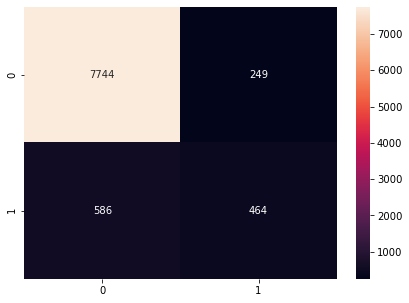

In [38]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7993
           1       0.65      0.44      0.53      1050

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043

ROC_AUC_SCORE is 0.7053762518394072


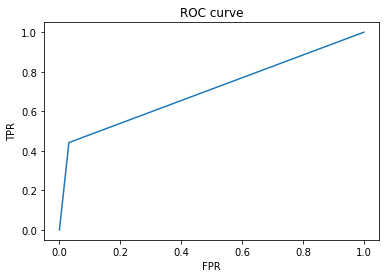

In [39]:
curve(y_test, y_pred)

In [40]:
y_pred, score_rf = MLmodel(RandomForestClassifier(), X_train_sm, y_train_sm, X_test, y_test)
print('Model score for Testing data is',score_rf)

Model score for Testing data is 0.8971580227800509


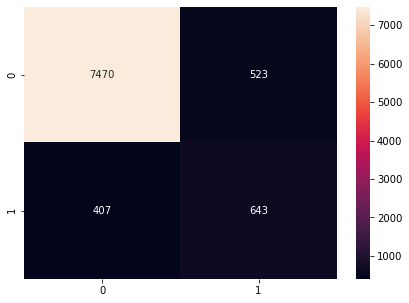

In [41]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7993
           1       0.55      0.61      0.58      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.77      0.76      9043
weighted avg       0.90      0.90      0.90      9043

ROC_AUC_SCORE is 0.7734743495796916


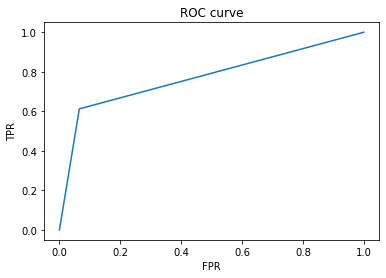

In [42]:
curve(y_test, y_pred)

In [43]:
rfc = RandomForestClassifier()

param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }

grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [44]:
y_pred, score_rf = MLmodel(RandomForestClassifier(n_estimators=15, max_features='log2', max_depth=8, criterion='gini',random_state=1), X_train_sm, y_train_sm, X_test, y_test)
print('Model score for Testing data is',score_rf)

Model score for Testing data is 0.8384385712705961


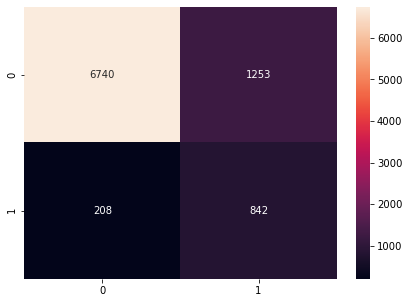

In [45]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7993
           1       0.40      0.80      0.54      1050

    accuracy                           0.84      9043
   macro avg       0.69      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043

ROC_AUC_SCORE is 0.822571297504364


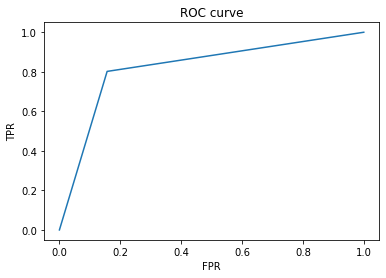

In [46]:
curve(y_test, y_pred)

## NN

In [47]:
# y = pd.get_dummies(bank_data.y)
# X = bank_data.drop('y', axis = 1)

In [48]:
# x = bank_data.drop('y', axis = 1)
# y = bank_data['y']

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [50]:
y_train_nn = pd.get_dummies(y_train)
y_test_nn = pd.get_dummies(y_test)

In [51]:
y_train_nn = to_categorical(y_train, num_classes=2)
y_test_nn = to_categorical(y_test, num_classes=2)

print("Shape of y_train:", y_train.shape)


Shape of y_train: (36168,)


In [52]:
def nn_model(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 1
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(16,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [53]:
lr = 1e-7
Lambda = 1e-7
nn_model(10, lr, Lambda)

Epoch 1/10
362/362 [==============================] - 2s 2ms/step - loss: 1.8939e-07 - accuracy: 0.1172
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8941e-07 - accuracy: 0.1172
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8942e-07 - accuracy: 0.1172
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8943e-07 - accuracy: 0.1172
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8945e-07 - accuracy: 0.1172
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8946e-07 - accuracy: 0.1172
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8948e-07 - accuracy: 0.1172
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8949e-07 - accuracy: 0.1172
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: 1.8950e-07 - accuracy: 0.1172
Epoch 10/10
362/362 [==============================] - 1s 2ms/st

[1.895241723559593e-07, 0.11720304936170578]

In [54]:
lr = 1e-2
Lambda = 1e-7
nn_model(10, lr, Lambda)

Epoch 1/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7943
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828


[nan, 0.8827969431877136]

In [55]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, -3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-3))
    best_acc = nn_model(10, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3244e-06 - accuracy: 0.1172
Epoch 2/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3245e-06 - accuracy: 0.1172
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3246e-06 - accuracy: 0.1172
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3247e-06 - accuracy: 0.1172
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3248e-06 - accuracy: 0.1172
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3249e-06 - accuracy: 0.1172
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3250e-06 - accuracy: 0.1172
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: 1.3251e-06 - accuracy: 0.1172
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 1.3252e-06 - accuracy: 0.1172
Epoch 10/10
362/362 [==============================] - 1s 3ms/st

362/362 [==============================] - 1s 2ms/step - loss: 2.3593e-06 - accuracy: 0.1172
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 6.9623e-06 - accuracy: 0.1172
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1357 
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 9/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8828
Try 8/100: Best_val_acc: 

In [56]:
## hyperparameters
iterations = 20
learning_rate = 5e-4 # 3e-5
# hidden_nodes = 256
# output_nodes = 2

model = Sequential()
model.add(Dense(256, input_shape=(16,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(3e-6)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train_nn, epochs=iterations, batch_size=100, verbose= 1, validation_data=(X_test, y_test_nn))

Epoch 1/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8771 - val_loss: 0.3114 - val_accuracy: 0.8839
Epoch 2/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2935 - accuracy: 0.8848 - val_loss: 0.2807 - val_accuracy: 0.8860
Epoch 3/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2730 - accuracy: 0.8891 - val_loss: 0.2681 - val_accuracy: 0.8875
Epoch 4/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8911 - val_loss: 0.2616 - val_accuracy: 0.8883
Epoch 5/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.8920 - val_loss: 0.2576 - val_accuracy: 0.8907
Epoch 6/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8931 - val_loss: 0.2546 - val_accuracy: 0.8916
Epoch 7/20
362/362 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8935 - val_loss: 0.2522 - val_accuracy: 0.8921
Epoch 

In [57]:
predictions = np.argmax(model.predict(X_test),axis=1)

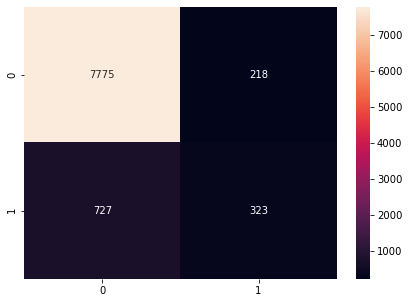

In [59]:
confusion_matrix_heatmap(y_test, predictions)

In [60]:
precision, recall, fscore, support = score(y_test, predictions)

In [61]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.91449071 0.59704251]
recall: [0.97272614 0.30761905]
fscore: [0.94270991 0.40603394]
support: [7993 1050]


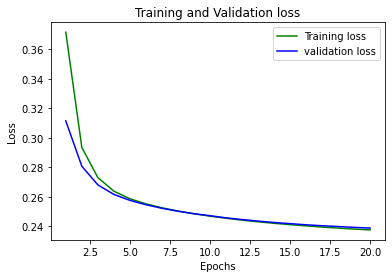

In [62]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

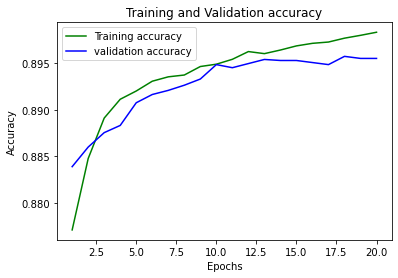

In [63]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## API Call

In [77]:
import json
import requests

url = "http://4efe5ad7-a921-4b4c-9817-a2e7f93593cc.eastus.azurecontainer.io/score"
headers = {'Content-Type': "application/json", 'Accept': "application/json"}

datajson = {"data": [[1.042859036067301, -0.19625298401039687, -0.2778602444879443, 1.0402609407012913, -0.1351736320748236, -0.4423292190414888, -1.1208342851186535, -0.4350487265233165, -0.7113454533368128, 0.7450270480366795, -1.5084519241076433, -0.1012334204727393, -0.24745481214337464, -0.4100383077247753, -0.2425228949874176, 0.4437811224266543], [0.8543918539891513, -1.275193196921366, 1.3637028595042098, -0.29720156341460596, -0.1351736320748236, -0.33557560530761765, 0.8921925509212439, -0.4350487265233165, 1.5198523921480407, 1.4661611778698793, 0.822788610246384, -0.9078284906496762, -0.5662418342485064, -0.4100383077247753, -0.2425228949874176, 0.4437811224266543], [0.3832238987937777, -1.0054581436936236, -0.2778602444879443, -1.634664067530503, -0.1351736320748236, -0.3452804792834241, 0.8921925509212439, -0.4350487265233165, -0.7113454533368128, 1.5863501995087461, -0.5093488379559173, -0.213691386987793, -0.5662418342485064, 2.211475799707499, 1.0119321842762885, -2.596119566195928], [-0.2764112384797454, 1.4221573353560568, -0.2778602444879443, -0.29720156341460596, -0.1351736320748236, -0.43359483246326297, 0.8921925509212439, -0.4350487265233165, 1.5198523921480407, -1.538564363101787, 0.15671988614523327, 0.5657586567889585, 0.3901192320668889, -0.4100383077247753, -0.2425228949874176, 0.4437811224266543]], "method": "predict"}

res = requests.put(url, json=datajson, headers=headers)
